In [79]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
data = pd.read_csv('DataScientist.csv', encoding='latin1')
print(data.head())

           Lokasi Jam Login      Nama                 Email     No Telp  \
0         Jakarta     22:00      Atin     atin789@gmail.com  8097394019   
1        Surabaya     23:00      Zeny    zenybaed@gmail.com  8088037768   
2         Cirebon      0:00  Muhtarom  muhtarom71@yahoo.com  8076846419   
3  Bandar Lampung      1:00      Alya     alya765@gmail.com  8048762908   
4         Jakarta      2:00     Fahze       fahze@gmail.com  8094649206   

   Tahun Lahir  Merk HP Digital Interest Tipe Lokasi  Duration  Usia  
0         2002   iPhone            Sport      Office        45    22  
1         2002  Samsung          Fashion        Home        75    22  
2         2002  Samsung            Sport        Home       100    22  
3         2002  Samsung             Food        Home        67    22  
4         2002  Samsung             Food        Home        54    22  


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Lokasi            2045 non-null   object
 1   Jam Login         2045 non-null   object
 2   Nama              2045 non-null   object
 3   Email             2045 non-null   object
 4   No Telp           2045 non-null   int64 
 5   Tahun Lahir       2045 non-null   int64 
 6   Merk HP           2045 non-null   object
 7   Digital Interest  2045 non-null   object
 8   Tipe Lokasi       2045 non-null   object
 9   Duration          2045 non-null   int64 
 10  Usia              2045 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 175.9+ KB


In [82]:
data.isna().sum()

,0
Lokasi,0
Jam Login,0
Nama,0
Email,0
No Telp,0
Tahun Lahir,0
Merk HP,0
Digital Interest,0
Tipe Lokasi,0
Duration,0


In [83]:
data.duplicated().sum()

0

In [84]:
data.describe()

,No Telp,Tahun Lahir,Duration,Usia
count,2.045000e+03,2045.000000,2045.000000,2045.000000
mean,8.054914e+09,2002.021516,87.057702,21.978484
std,2.627615e+07,7.547017,36.105014,7.547017
min,8.010017e+09,1983.000000,25.000000,9.000000
25%,8.031667e+09,1996.000000,56.000000,16.000000
50%,8.054975e+09,2002.000000,87.000000,22.000000
75%,8.077743e+09,2008.000000,118.000000,28.000000
max,8.099974e+09,2015.000000,150.000000,41.000000


In [85]:
# Get top 5 locations and combine the rest into "Other"
locations = data['Lokasi'].value_counts()
print(locations)

Lokasi
Jakarta           576
Bekasi            213
Bali              192
Surabaya          175
Bandar Lampung    143
Bandung           107
Depok             106
Yogyakarta         90
Palembang          61
Aceh               61
Makassar           57
Jambi              35
Cikarang           34
Maluku             23
Cirebon            22
Papua              20
Nusa Tenggara      18
Balikpapan         17
Tangerang          15
Bogor              15
Malang             14
Kupang             13
Semarang           12
Manokwari           8
Palangkaraya        7
Manado              5
Padang              4
Kendari             2
Name: count, dtype: int64


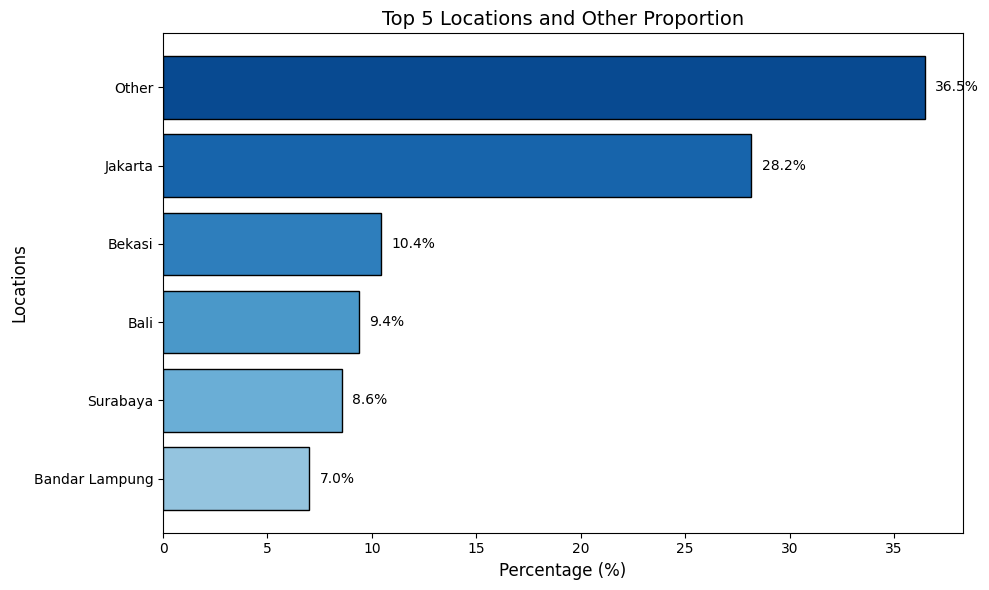

In [86]:
# Get top 5 locations and combine the rest into "Other"
top_locations = locations.head(5)
others = locations.iloc[5:].sum()
top_locations['Other'] = others

# Calculate percentages
top_locations_percent = top_locations / locations.sum() * 100

# Sort locations by percentage
top_locations_percent = top_locations_percent.sort_values(ascending=False)

# Create a gradient of colors
color_base = np.linspace(0.9, 0.4, len(top_locations_percent))
colors = [plt.cm.Blues(c) for c in color_base]

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(top_locations_percent.index, top_locations_percent.values, color=colors, edgecolor='black')

# Add annotations for percentage values
for bar, percentage in zip(bars, top_locations_percent):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{percentage:.1f}%',
             va='center', fontsize=10)

# Add labels and title
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Locations', fontsize=12)
plt.title('Top 5 Locations and Other Proportion', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()

# Show the plot
plt.show()


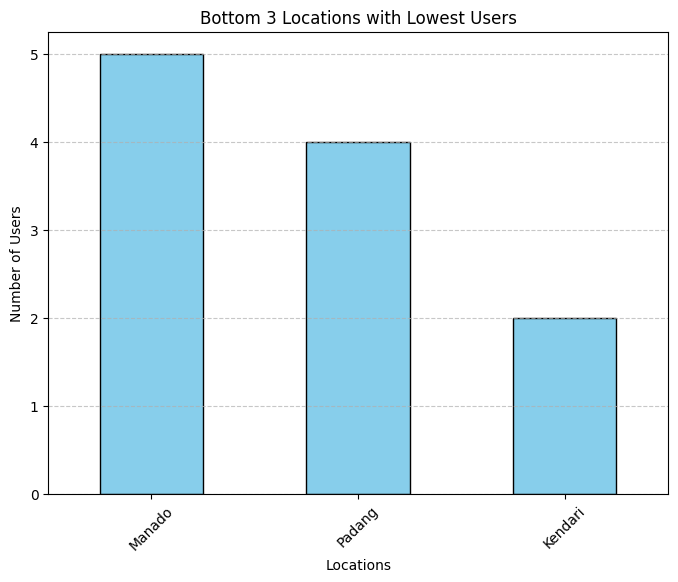

In [87]:
bottom_locations = data['Lokasi'].value_counts().tail(3)

plt.figure(figsize=(8, 6))
bottom_locations.plot.bar(color="skyblue", edgecolor="black")
plt.title('Bottom 3 Locations with Lowest Users')
plt.xlabel('Locations')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [88]:
# User based on location type
location_counts = data['Tipe Lokasi'].value_counts().reset_index()
location_counts

,Tipe Lokasi,count
0,Home,943
1,Office,468
2,Cafe,318
3,Mall,316


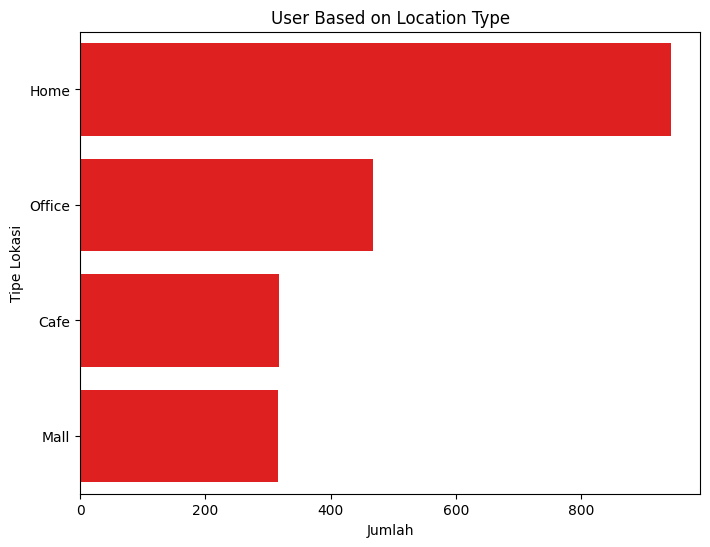

In [89]:

location_counts.columns = ['Tipe Lokasi', 'Count']

location_counts = location_counts.sort_values(by='Count', ascending=False)

#Create bar plot horizontal
plt.figure(figsize=(8, 6))
sns.barplot(x='Count', y='Tipe Lokasi', data=location_counts, color='red', orient='h')

#Add lable and title
plt.xlabel('Jumlah')
plt.ylabel('Tipe Lokasi')
plt.title('User Based on Location Type')

#Show the plot
plt.show()

In [90]:
# Convert Jam Login to datetime format
data['Jam Login'] = pd.to_datetime(data['Jam Login'])

# Extract the hour from the Jam Login column
data['Hour'] = data['Jam Login'].dt.hour

# Count the number of users online in each hour
hourly_users = data['Hour'].value_counts().sort_index()

# Show the daily hour user
print(hourly_users)

Hour
0      91
1      88
2      81
3      80
4      74
5      71
6      73
7      68
8      66
9      68
10     74
11     70
12     71
13     95
14     80
15     81
16     84
17     88
18    118
19    105
20    116
21    105
22    101
23     97
Name: count, dtype: int64


<ipython-input-90-805d3c5b5e16>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Jam Login'] = pd.to_datetime(data['Jam Login'])


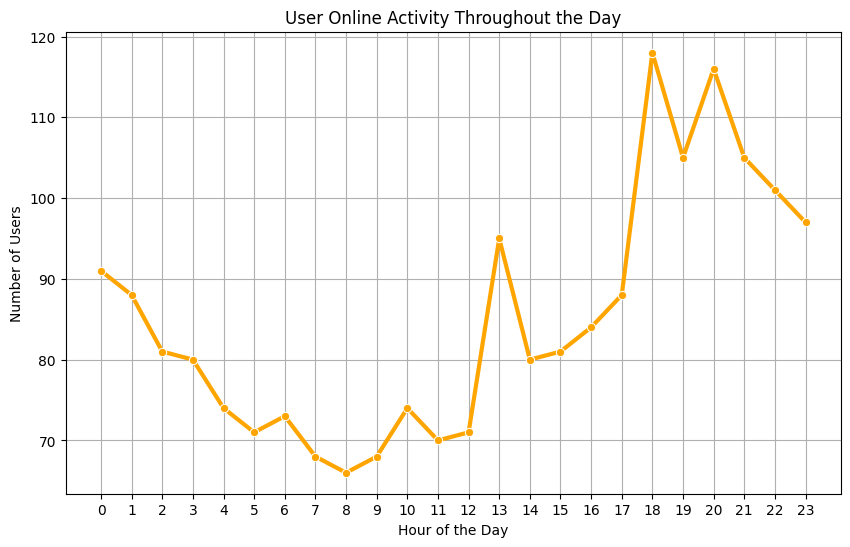

In [91]:
# Plotting a line plot for all hours of the day
plt.figure(figsize=(10,6))
sns.lineplot(x=hourly_users.index, y=hourly_users.values, marker='o', color='orange', linewidth=3)

# Add labels and title to the plot
plt.title('User Online Activity Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Users')

# Show the plot
plt.xticks(range(24))
plt.grid(True)
plt.show()

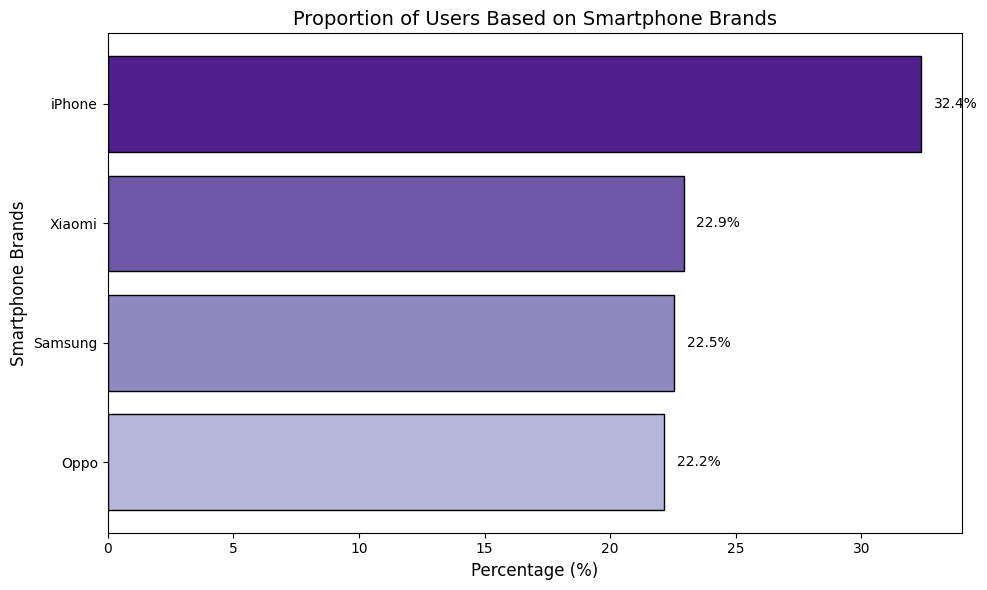

In [92]:
brands = data['Merk HP'].value_counts()

# Calculate percentages for each brand
brands_percent = brands / brands.sum() * 100

# Sort brands by percentage
brands_percent = brands_percent.sort_values(ascending=False)

# Create a gradient of colors
color_base = np.linspace(0.9, 0.4, len(brands_percent))
colors = [plt.cm.Purples(c) for c in color_base]

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(brands_percent.index, brands_percent.values, color=colors, edgecolor='black')

# Add percentage annotations for each bar
for bar, percentage in zip(bars, brands_percent):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{percentage:.1f}%',
             va='center', fontsize=10)

# Add labels and title
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Smartphone Brands', fontsize=12)
plt.title('Proportion of Users Based on Smartphone Brands', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()

# Show plot
plt.show()

<ipython-input-93-30d04aa4f0eb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=interest_counts.index, y=interest_counts.values, palette='viridis')


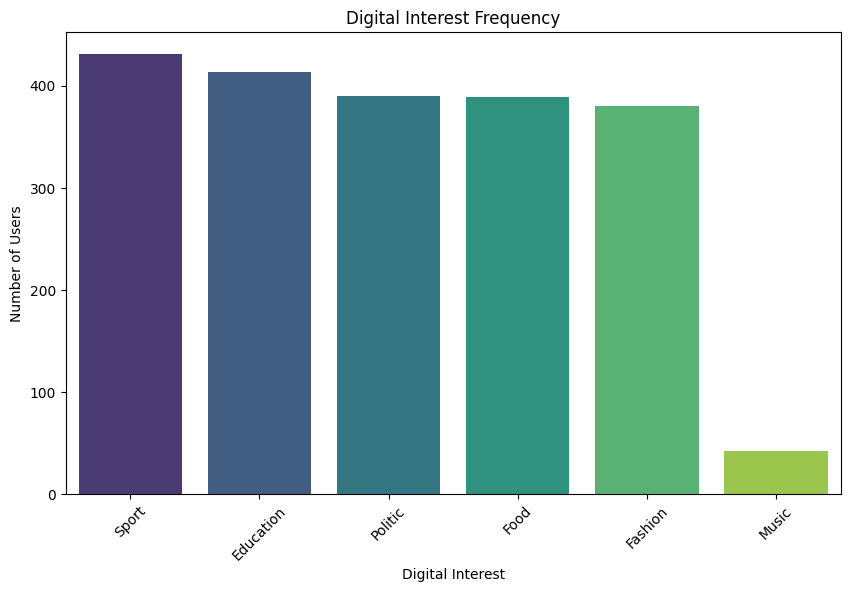

In [93]:
# Count the number of interactions for each 'Digital Interest'
interest_counts = data['Digital Interest'].value_counts()

# Create a bar plot for digital interest counts
plt.figure(figsize=(10, 6))
sns.barplot(x=interest_counts.index, y=interest_counts.values, palette='viridis')

# Add labels and title
plt.title('Digital Interest Frequency')
plt.xlabel('Digital Interest')
plt.ylabel('Number of Users')

# Display the plot
plt.xticks(rotation=45)
plt.show()

Age Confidence Interval (95%): (21.65119315931528, 22.305775055843643)


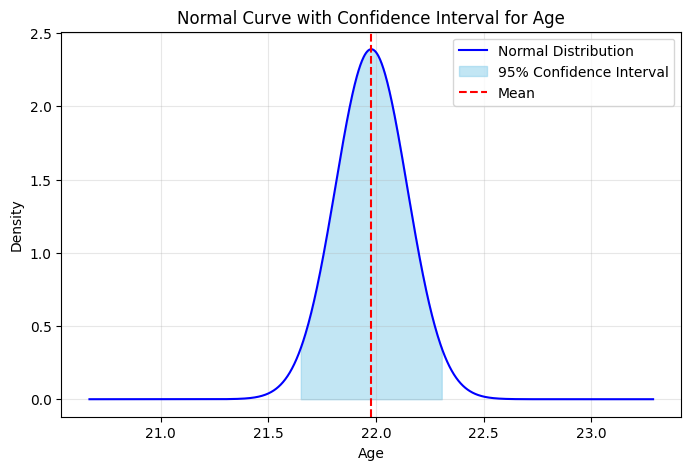

In [94]:
import scipy.stats as stats

# Calculate mean, standard error, and confidence interval for 'Age'
age_data = data['Usia'].dropna()  # Ensure no missing values
age_mean = np.mean(age_data)
age_sem = stats.sem(age_data)
confidence_level = 0.95
age_margin_of_error = age_sem * stats.t.ppf((1 + confidence_level) / 2.0, df=len(age_data) - 1)
age_confidence_interval = (age_mean - age_margin_of_error, age_mean + age_margin_of_error)

print(f"Age Confidence Interval (95%): {age_confidence_interval}")

# Generate data for normal distribution
x = np.linspace(age_mean - 4 * age_margin_of_error, age_mean + 4 * age_margin_of_error, 1000)
y = stats.norm.pdf(x, loc=age_mean, scale=age_sem)

# Plot the normal curve
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='Normal Distribution', color='blue')

# Shade the confidence interval area
ci_x = np.linspace(age_confidence_interval[0], age_confidence_interval[1], 100)
ci_y = stats.norm.pdf(ci_x, loc=age_mean, scale=age_sem)
plt.fill_between(ci_x, ci_y, color='skyblue', alpha=0.5, label='95% Confidence Interval')

# Add titles and labels
plt.title('Normal Curve with Confidence Interval for Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.axvline(age_mean, color='red', linestyle='--', label='Mean')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Duration Confidence Interval (95%): (85.4919381148821, 88.62346530810079)


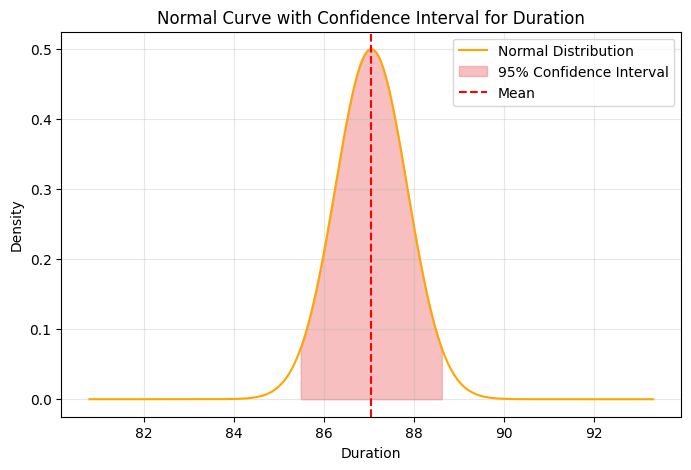

In [95]:
# Calculate mean, standard error, and confidence interval for 'Duration'
duration_data = data['Duration'].dropna()  # Ensure no missing values
duration_mean = np.mean(duration_data)
duration_sem = stats.sem(duration_data)
duration_margin_of_error = duration_sem * stats.t.ppf((1 + confidence_level) / 2.0, df=len(duration_data) - 1)
duration_confidence_interval = (duration_mean - duration_margin_of_error, duration_mean + duration_margin_of_error)

print(f"Duration Confidence Interval (95%): {duration_confidence_interval}")

x = np.linspace(duration_mean - 4 * duration_margin_of_error, duration_mean + 4 * duration_margin_of_error, 1000)
y = stats.norm.pdf(x, loc=duration_mean, scale=duration_sem)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label='Normal Distribution', color='orange')

ci_x = np.linspace(duration_confidence_interval[0], duration_confidence_interval[1], 100)
ci_y = stats.norm.pdf(ci_x, loc=duration_mean, scale=duration_sem)
plt.fill_between(ci_x, ci_y, color='lightcoral', alpha=0.5, label='95% Confidence Interval')

plt.title('Normal Curve with Confidence Interval for Duration')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.axvline(duration_mean, color='red', linestyle='--', label='Mean')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [96]:
# Define age bins based on your yearborn criteria
age_bins = [8, 17, 24, 33, 41]
age_bin_labels = ['2008-2015', '2000-2007', '1991-1997', '1983-1990']

data['age_group'] = pd.cut(data['Usia'], bins=age_bins, labels=age_bin_labels, right=False)

print(data[['Usia', 'age_group']].head())

   Usia  age_group
0    22  2000-2007
1    22  2000-2007
2    22  2000-2007
3    22  2000-2007
4    22  2000-2007


In [97]:
# Calculate the distribution of digital interest by 'age_group'
digital_interest_by_age_group = data.groupby(['age_group', 'Digital Interest']).size().unstack(fill_value=0)

# Normalize by rows to get proportions
digital_interest_proportions = digital_interest_by_age_group.div(digital_interest_by_age_group.sum(axis=1), axis=0)

# Display the proportions for inspection
print(digital_interest_proportions)

Digital Interest  Education   Fashion      Food     Music   Politic     Sport
age_group                                                                    
2008-2015          0.269430  0.183074  0.165803  0.008636  0.170984  0.202073
2000-2007          0.142857  0.201465  0.188645  0.034799  0.194139  0.238095
1991-1997          0.197597  0.165554  0.206943  0.020027  0.197597  0.212283
1983-1990          0.180723  0.228916  0.210843  0.018072  0.216867  0.144578


<ipython-input-97-c6f4d322b4f4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  digital_interest_by_age_group = data.groupby(['age_group', 'Digital Interest']).size().unstack(fill_value=0)


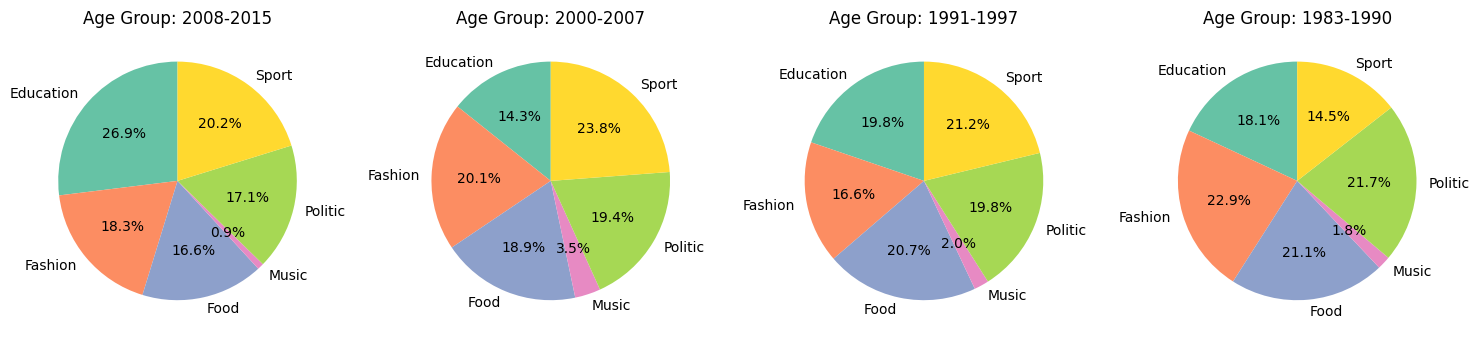

In [98]:
# Loop through each age group and plot a separate pie chart
age_groups = digital_interest_by_age_group.index

# Set up the subplot grid for pie charts
fig, axes = plt.subplots(1, len(age_groups), figsize=(15, 7))

# Plot a pie chart for each age group
for i, age_group in enumerate(age_groups):
    # Get the proportions for the age group
    data_for_age_group = digital_interest_by_age_group.loc[age_group]
    data_for_age_group_normalized = data_for_age_group / data_for_age_group.sum()

    # Create pie chart for the age group
    axes[i].pie(data_for_age_group_normalized, labels=data_for_age_group_normalized.index, autopct='%1.1f%%',
                colors=plt.cm.Set2.colors, startangle=90)
    axes[i].set_title(f'Age Group: {age_group}')

# Show plot
plt.tight_layout()
plt.show()


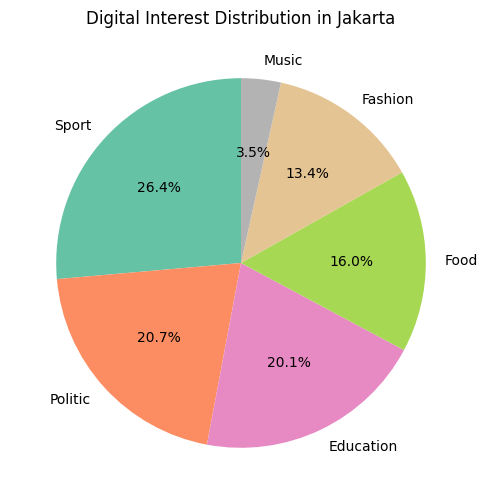

In [99]:
# Filter data for location Jakarta
jakarta_data = data[data['Lokasi'] == 'Jakarta']

# Group by 'digital interest' and calculate the proportion in Jakarta
jakarta_digital_interest = jakarta_data['Digital Interest'].value_counts(normalize=True)

# Plot pie chart for digital interest in Jakarta
plt.figure(figsize=(8, 6))
jakarta_digital_interest.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set2', legend=False)
plt.title('Digital Interest Distribution in Jakarta')
plt.ylabel('')
plt.show()

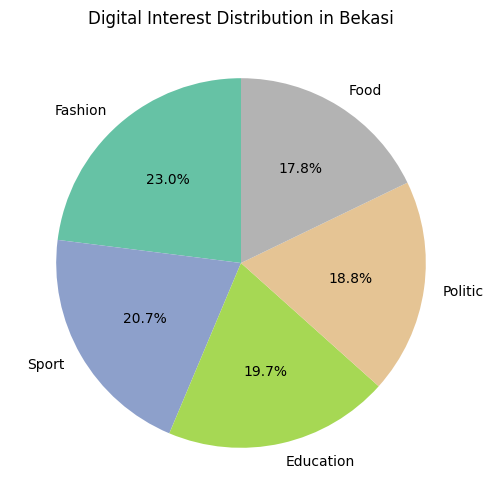

In [100]:
# Filter data for location Bekasi
bekasi_data = data[data['Lokasi'] == 'Bekasi']

# Group by 'digital interest' and calculate the proportion in Bekasi
bekasi_digital_interest = bekasi_data['Digital Interest'].value_counts(normalize=True)

# Plot pie chart for digital interest in Bekasi
plt.figure(figsize=(8, 6))
bekasi_digital_interest.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set2', legend=False)
plt.title('Digital Interest Distribution in Bekasi')
plt.ylabel('')
plt.show()

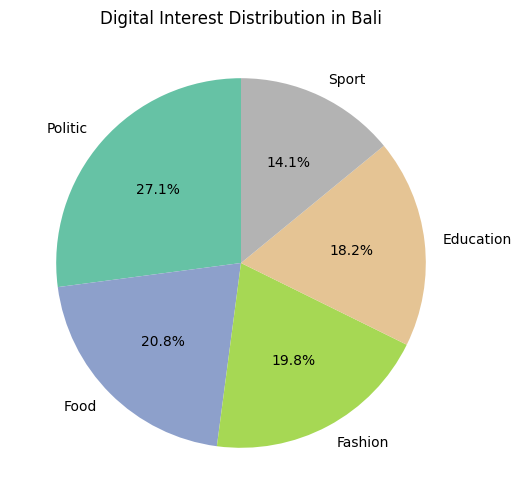

In [101]:
# Filter data for location Bali
bali_data = data[data['Lokasi'] == 'Bali']

# Group by 'digital interest' and calculate the proportion in Bali
bali_digital_interest = bali_data['Digital Interest'].value_counts(normalize=True)

# Plot pie chart for digital interest in Bali
plt.figure(figsize=(8, 6))
bali_digital_interest.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set2', legend=False)
plt.title('Digital Interest Distribution in Bali')
plt.ylabel('')
plt.show()

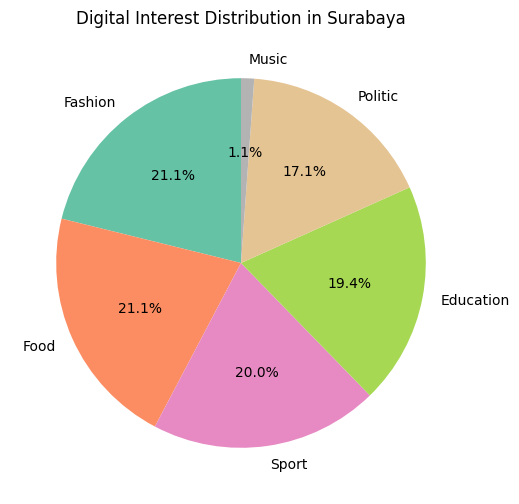

In [102]:
# Filter data for location Surabaya
surabaya_data = data[data['Lokasi'] == 'Surabaya']

# Group by 'digital interest' and calculate the proportion in Surabaya
surabaya_digital_interest = surabaya_data['Digital Interest'].value_counts(normalize=True)

# Plot pie chart for digital interest in Surabaya
plt.figure(figsize=(8, 6))
surabaya_digital_interest.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set2', legend=False)
plt.title('Digital Interest Distribution in Surabaya')
plt.ylabel('')
plt.show()

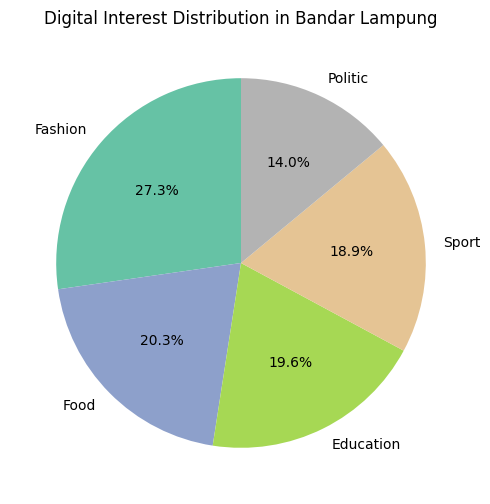

In [103]:
# Filter data for location Bandar Lampung
balam_data = data[data['Lokasi'] == 'Bandar Lampung']

# Group by 'digital interest' and calculate the proportion in Bandar Lampung
balam_digital_interest = balam_data['Digital Interest'].value_counts(normalize=True)

# Plot pie chart for digital interest in Bandar Lampung
plt.figure(figsize=(8, 6))
balam_digital_interest.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set2', legend=False)
plt.title('Digital Interest Distribution in Bandar Lampung')
plt.ylabel('')
plt.show()